In [1]:
import pandas as pd
from oct_Utils import *
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties
import pingouin as pg
font = FontProperties(fname='/home/octusr3/simhei.ttf', size=15)
file_path='/home/octusr3/project/oct/temp/data.csv'
data=pd.read_csv(file_path)

/home/octusr3/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
Duplicate key in file PosixPath('/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 260 ('font.family:  sans-serif')
Duplicate key in file PosixPath('/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 268 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file PosixPath('/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 411 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')


In [4]:
print(matplotlib.matplotlib_fname())

/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [5]:
matplotlib.get_cachedir()

'/home/octusr3/.cache/matplotlib'

In [2]:
valid_mask ='''[[0 0 0 0 0 0 0 0 0 0]
                [0 0 0 1 1 1 1 0 0 0]
                [0 0 1 1 1 1 1 1 0 0]
                [0 1 1 1 1 1 1 1 1 0]
                [1 1 1 1 1 1 1 1 1 0]
                [1 1 1 1 1 1 1 1 1 0]
                [0 1 1 1 1 1 1 1 1 0]
                [0 0 1 1 1 1 1 1 0 0]
                [0 0 0 1 1 1 1 0 0 0]
                [0 0 0 0 0 0 0 0 0 0]]'''

od_valid_mask = str_to_np_mat(valid_mask) == 1



def restore_pred_matrix(row):#存储预测的矩阵
    result = np.zeros((10, 10), dtype=float)
    result[od_valid_mask] = str_to_np_array(row['pred'])#相当于把valid_point的地方,也就是矩阵为True的地方，赋值给pred,按照一行一行的顺序排列数据。
    if row['eye'] == 'OS':
        result = np.flip(result, axis=1)
    return result

def restore_pred_list(row):#存储预测的序列
    mat = restore_pred_matrix(row)
    if row['eye'] == 'OS':
        mat = np.flip(mat, axis=1)
    return mat[od_valid_mask].tolist()

def convert_num_to_list(row):#将str类型的二维矩阵数字转换成list
    mat = str_to_np_mat(row['num'])
    if row['eye'] == 'OS':
        mat = np.flip(mat, axis=1)
    return mat[od_valid_mask].tolist()

data['pred_mat'] = data.apply(lambda row: restore_pred_matrix(row), axis=1)
data['pred_array'] = data.apply(lambda row: restore_pred_list(row), axis=1)
data['num_array'] = data.apply(lambda row:convert_num_to_list(row), axis=1)

In [3]:
data[['pred'+f'_l{i}' for i in range(1, 55)]]=pd.DataFrame(data['pred_array'].tolist(), index=data.index)
data[['num'+f'_l{i}' for i in range(1, 55)]]=pd.DataFrame(data['num_array'].tolist(), index=data.index)#ok数字是全有的

/home/octusr3/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


In [4]:
data.drop(['num_l26'],axis=1,inplace=True)
data.drop(['num_l35'],axis=1,inplace=True)
data.drop(['pred_l26'],axis=1,inplace=True)
data.drop(['pred_l35'],axis=1,inplace=True)

In [ ]:
from scipy.stats import pearsonr
pccs = pearsonr(np.array(data['num_l54']), np.array(data['pred_l54']))[0]

In [5]:
def plot_blandaltman_img(data,image_path='/home/octusr3/project/oct/temp'):
    num_cols = ['num'+f'_l{i}' for i in range(1, 55)]
    pred_cols= ['pred'+f'_l{i}' for i in range(1, 55)]
    num_cols.remove('num_l26')
    num_cols.remove('num_l35')
    pred_cols.remove('pred_l26')
    pred_cols.remove('pred_l35')
    plt.figure(figsize=(600, 900))
    for (i,num_col,pred_col) in zip(range(0,52),num_cols,pred_cols):

        ax = pg.plot_blandaltman(data[num_col], data[pred_col])
        plt.savefig(image_path+f'/bland_altman/{i}.png')

In [45]:
def plot_reg_img(data,image_path='/home/octusr3/project/oct/temp'):
    num_cols = ['num'+f'_l{i}' for i in range(1, 55)]
    pred_cols= ['pred'+f'_l{i}' for i in range(1, 55)]
    num_cols.remove('num_l26')
    num_cols.remove('num_l35')
    pred_cols.remove('pred_l26')
    pred_cols.remove('pred_l35')
    for (i,num_col,pred_col) in zip(range(0,52),num_cols,pred_cols):
        #pccs = np.corrcoef(x, y)
        #fig=sns.regplot(x=num_col, y=pred_col, data=data,color='royalblue',marker="+")
        fig=sns.regplot(x=num_col, y=pred_col, data=data,color='royalblue',marker="+").text(0, 1,'PCC='+str(pearsonr(np.array(data[num_col]), np.array(data[pred_col]))[0]),color ="green", fontsize=9,transform=sns.regplot(x=num_col, y=pred_col, data=data,color='royalblue',marker="+").transAxes)
        scatter_fig = fig.get_figure()
        scatter_fig.savefig(image_path+f'/reg/{i}.png', dpi = 400)


Text(0, 1, 'PCC=0.38209142539463387')

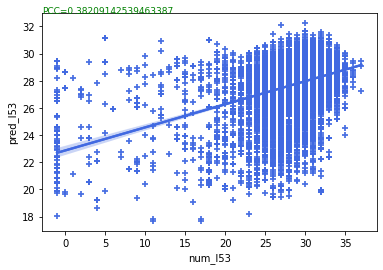

In [46]:
sns.regplot(x='num_l53', y='pred_l53', data=data,color='royalblue',marker="+").text(0, 1,'PCC='+str(pearsonr(np.array(data['num_l53']), np.array(data['pred_l53']))[0]),color ="green", fontsize=9,transform=sns.regplot(x='num_l53', y='pred_l53', data=data,color='royalblue',marker="+").transAxes)
#fig.text(0.85, 0.85,'Text Here', fontsize=9)

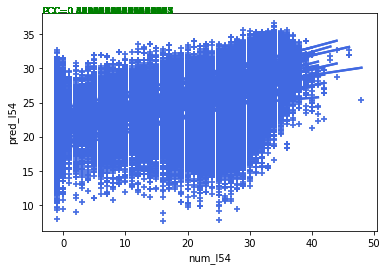

In [47]:
plot_reg_img(data)

<AxesSubplot:xlabel='num_l53', ylabel='pred_l53'>

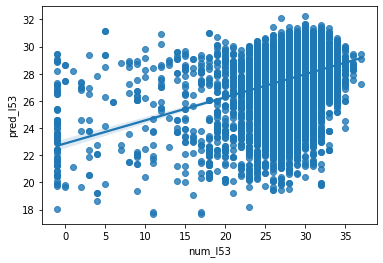

In [11]:
sns.regplot(x='num_l53', y='pred_l53', data=data)

In [ ]:
data['num_l54']

In [22]:
from scipy.stats import pearsonr
pccs = pearsonr(np.array(data['num_l54']), np.array(data['pred_l54']))[0]

In [23]:
pccs[0]

(0.3731868146156849, 0.0)

In [19]:
np.array(data['num_l54']).shape

(13392,)

In [16]:
pccs

array([[1.        , 0.37318681],
       [0.37318681, 1.        ]])

In [ ]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

rng = np.random.RandomState(1) #保证每次生成相同的随机序列

x = rng.normal(0, 5, size = 10000)
y = np.sin(x)
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y = sin(x)')

r = pearsonr(x,y)[0]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei Mono
/home/octusr3/anaconda3/lib/python3.7/site-packages/pingouin/plotting.py:151: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)


<Figure size 43200x64800 with 0 Axes>

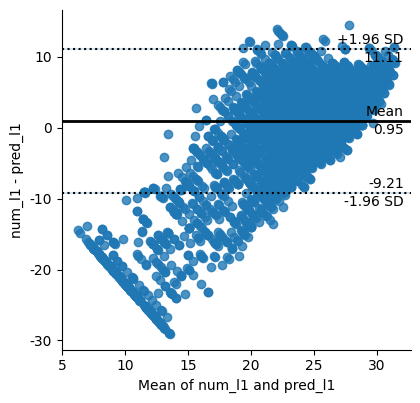

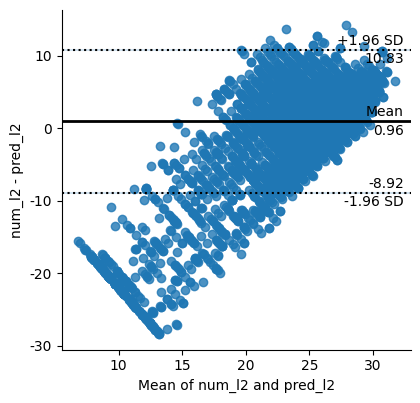

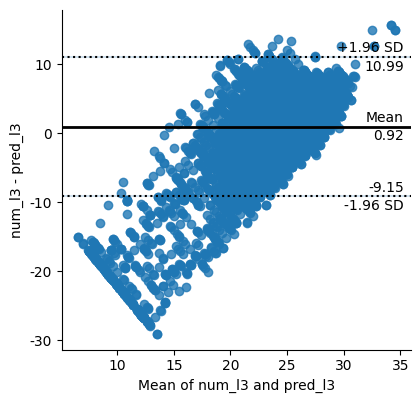

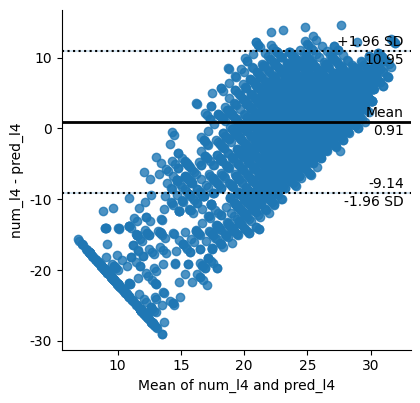

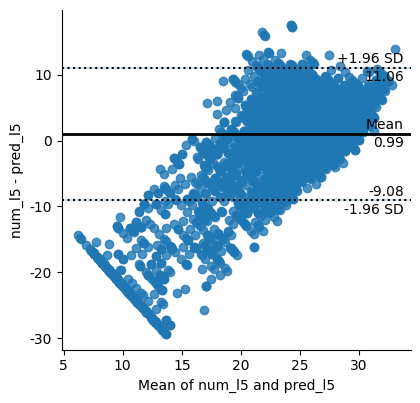

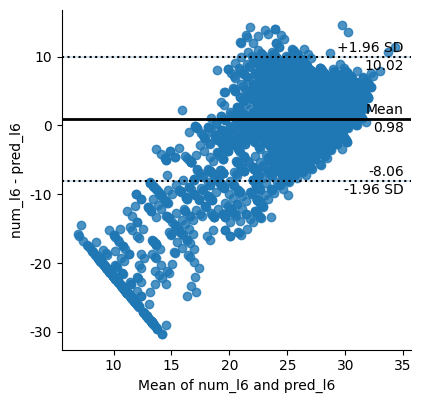

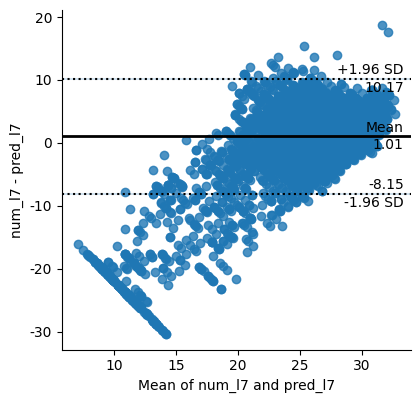

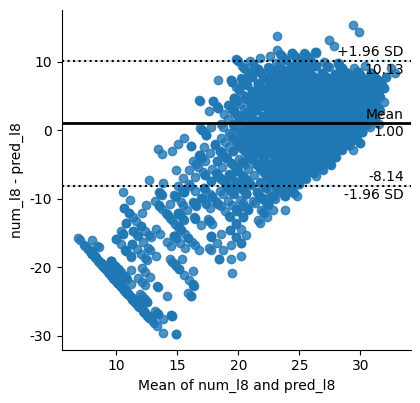

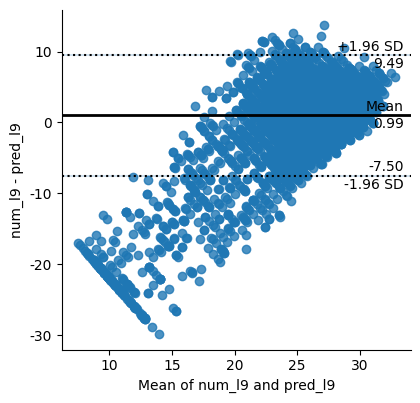

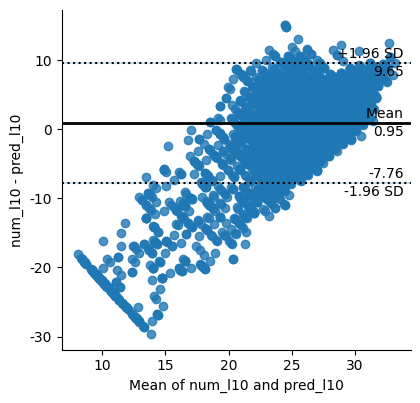

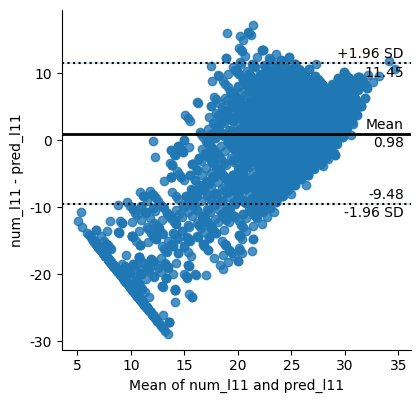

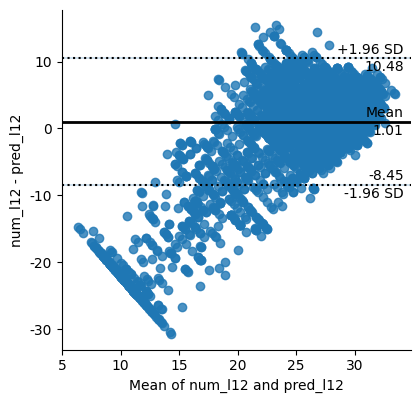

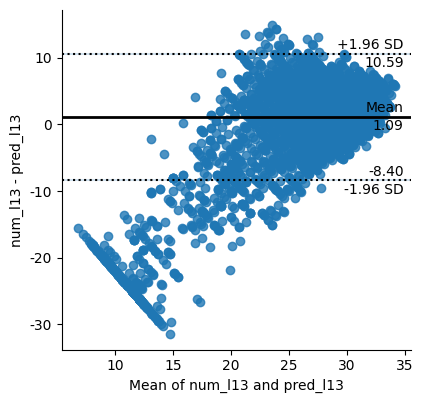

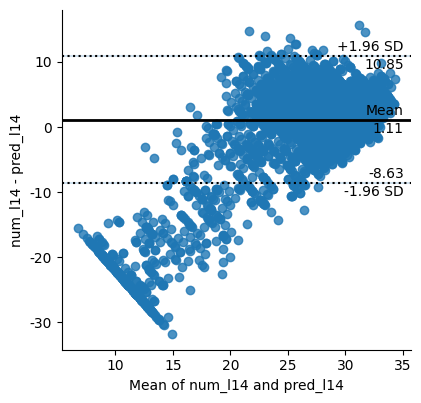

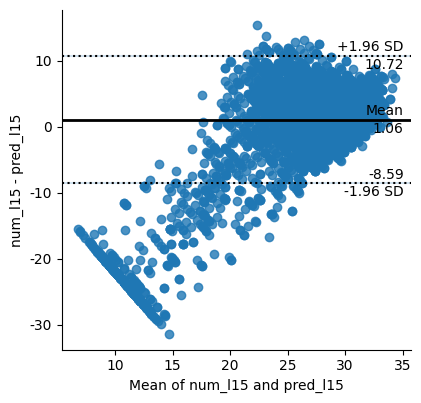

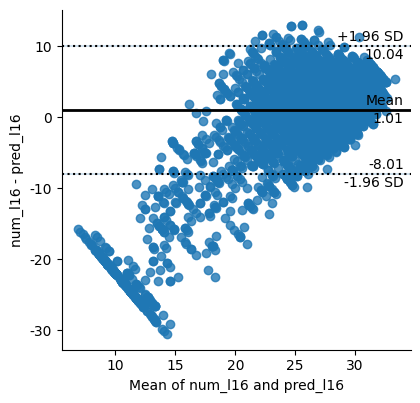

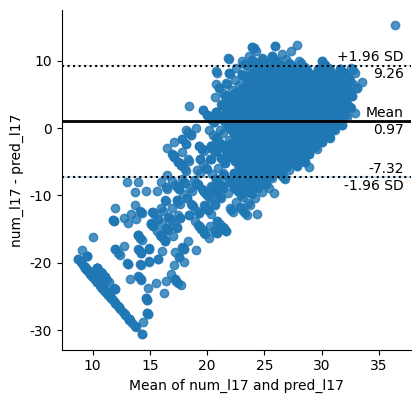

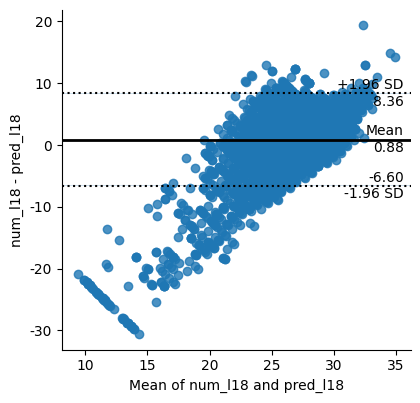

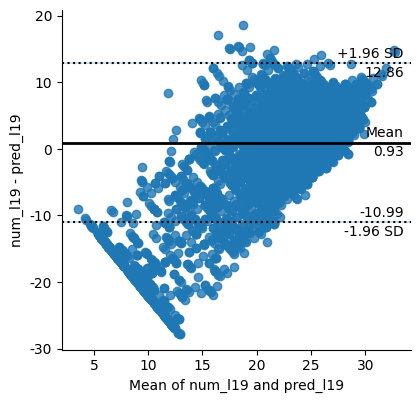

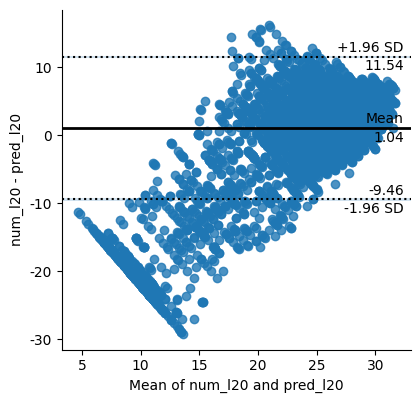

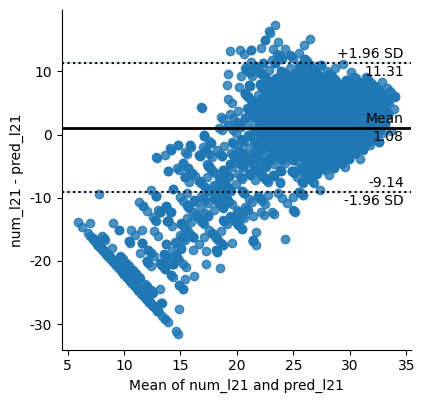

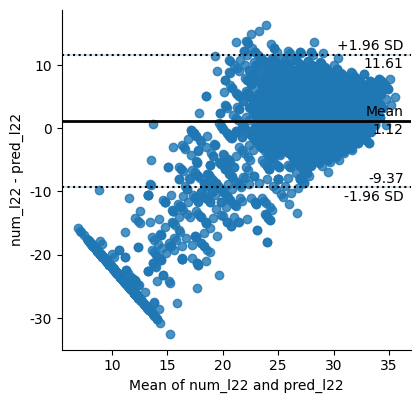

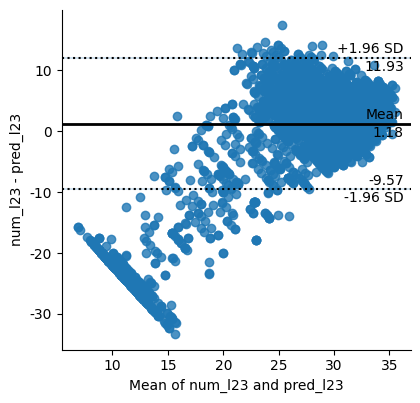

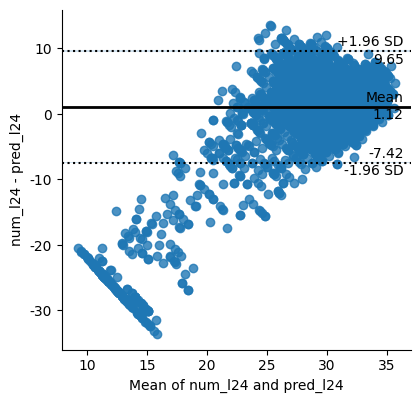

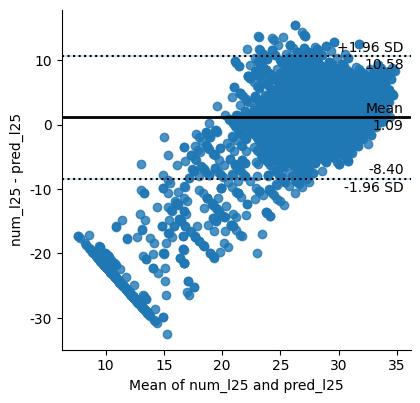

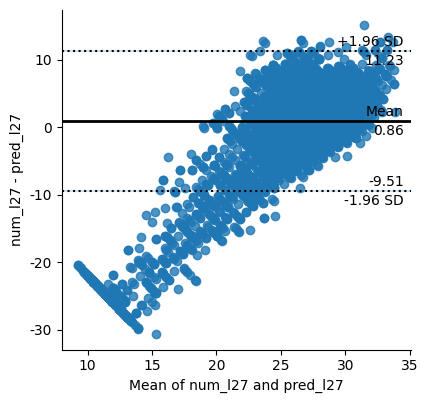

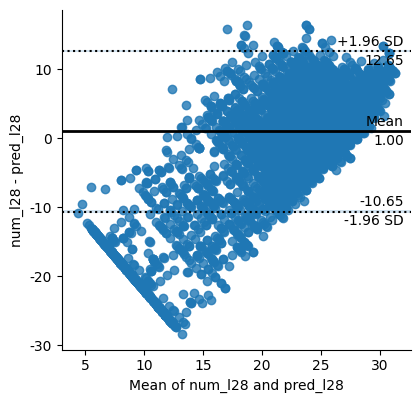

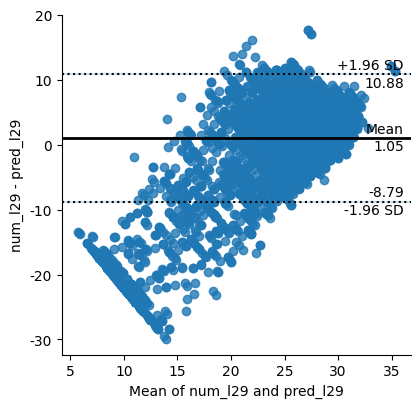

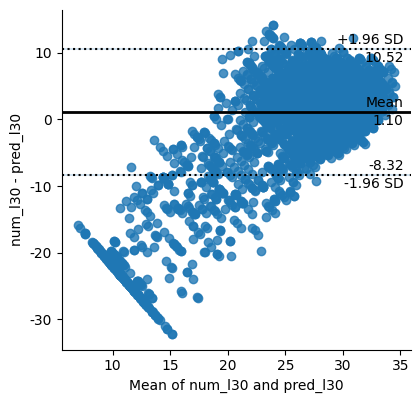

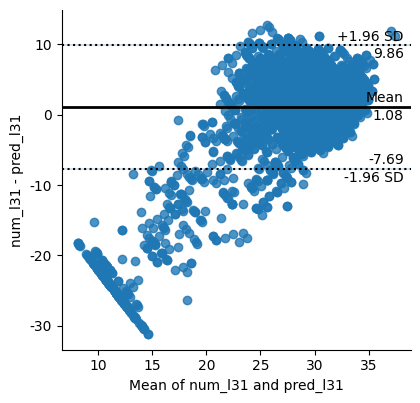

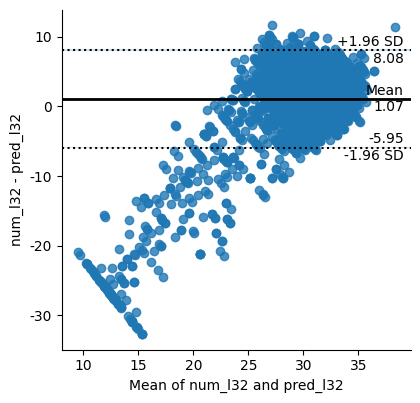

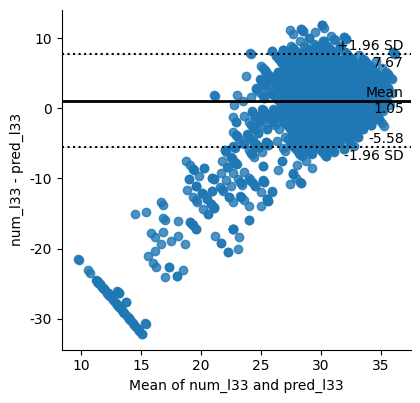

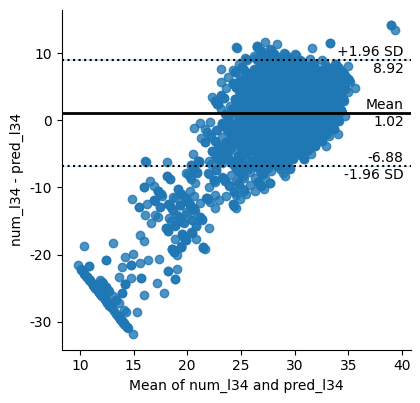

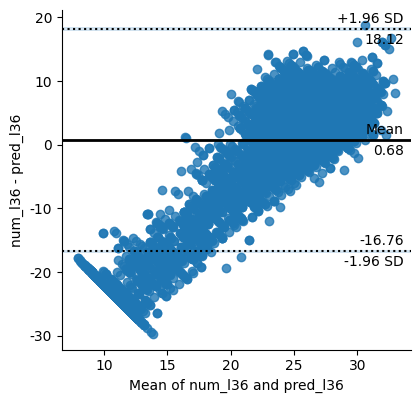

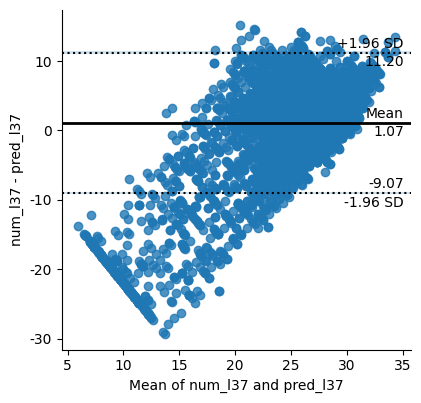

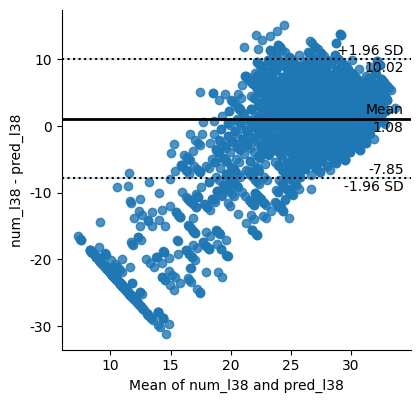

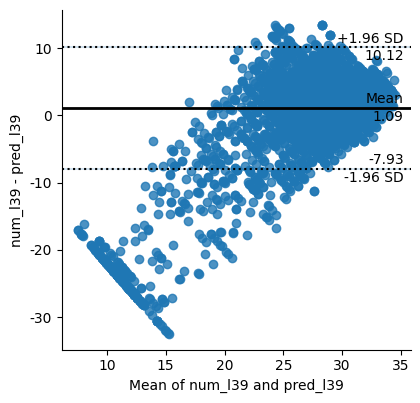

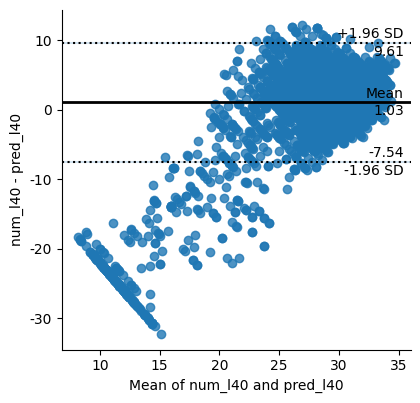

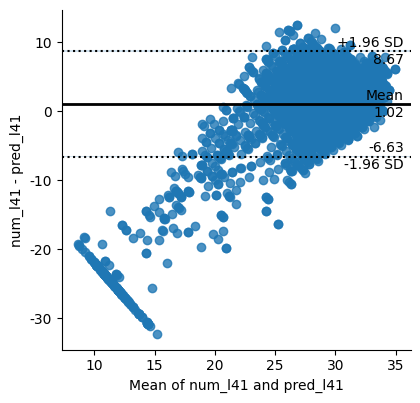

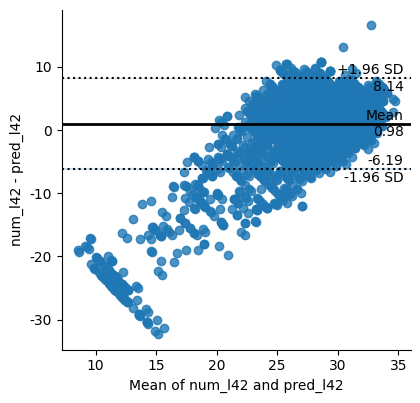

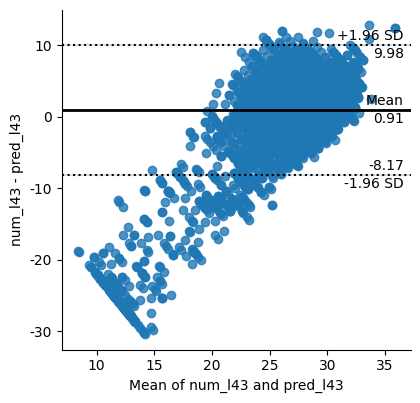

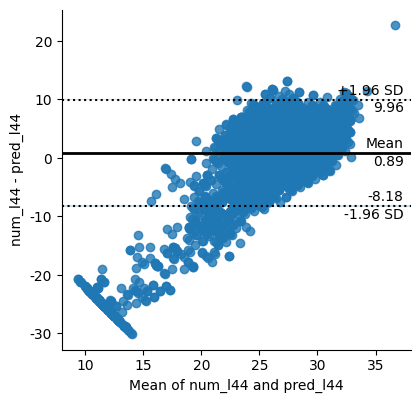

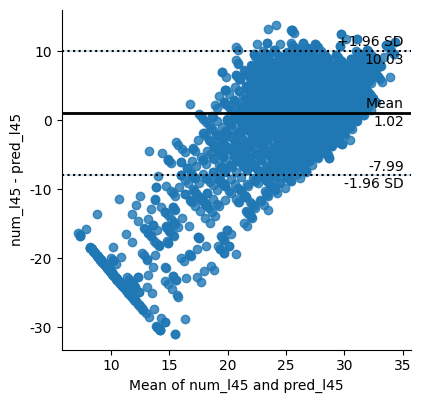

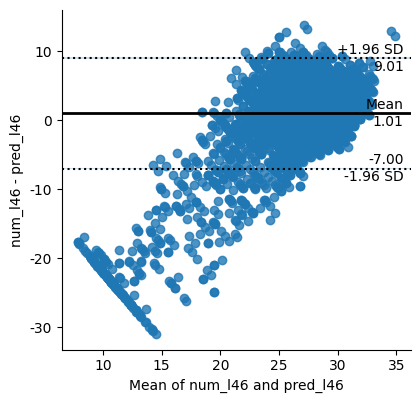

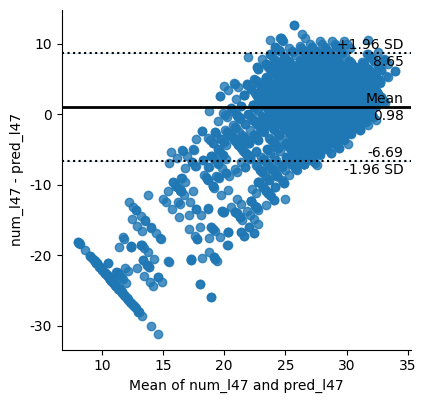

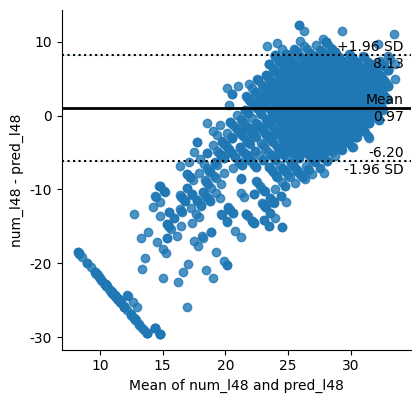

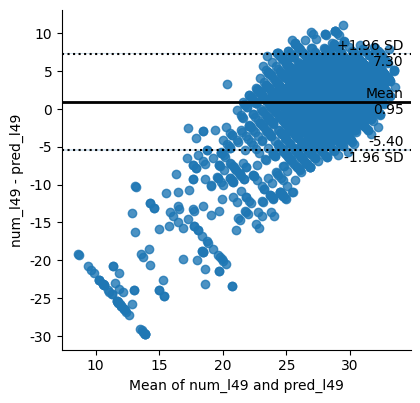

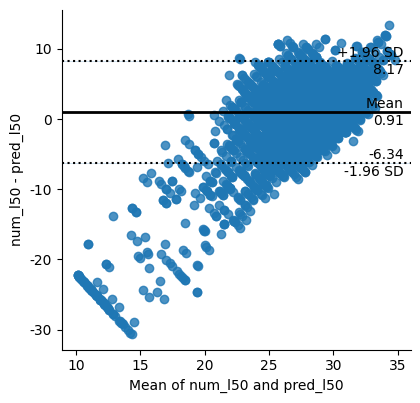

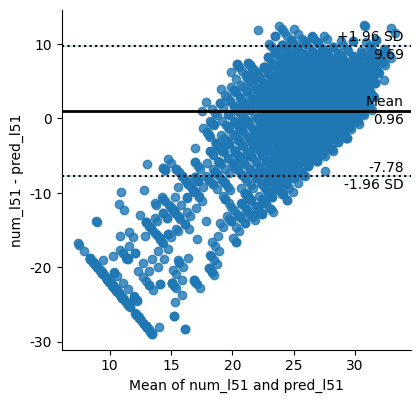

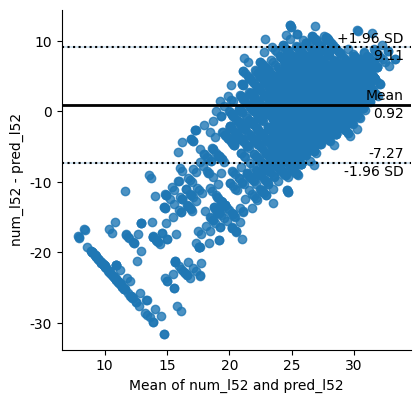

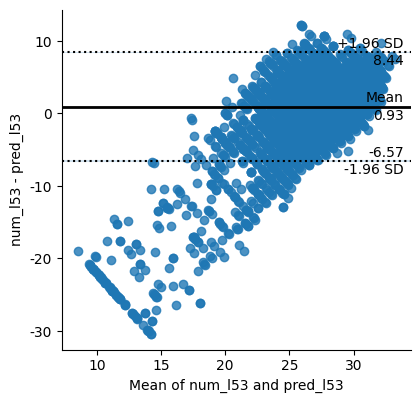

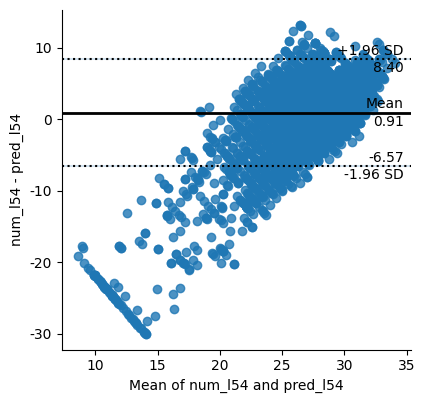

In [10]:
plot_blandaltman_img(data)